# EV Car Prices

This assignment focuses on car prices. The data ('car_prices.xlsx') is a pre-processed version of original data scraped from bilbasen.dk by previous MAL1 students. The dataset contains 16 columns:

- **Price (DKK)**: The current listed price of the vehicle in Danish Kroner.
- **Model Year**: The manufacturing year of the vehicle.
- **Mileage (km)**: The total kilometres driven by the vehicle (odometer reading).
- **Electric Range (km)**: The estimated maximum driving range on a full charge.
- **Battery Capacity (kWh)**: The total capacity of the vehicle's battery in kilowatt-hours.
- **Energy Consumption (Wh/km)**: The vehicle's energy consumption in watt-hours per kilometre.
- **Annual Road Tax (DKK)**: The annual road tax cost in Danish Kroner.
- **Horsepower (bhp)**: The vehicle's horsepower (brake horsepower).
- **0-100 km/h (s)**: The time (in seconds) for the car to accelerate from 0 to 100 km/h.
- **Top Speed (km/h)**: The maximum speed the vehicle can achieve.
- **Towing Capacity (kg)**: The maximum weight the vehicle can tow.
- **Original Price (DKK)**: The price of the vehicle when first sold as new.
- **Number of Doors**: The total number of doors on the vehicle.
- **Rear-Wheel Drive**: A binary indicator (1 = Yes, 0 = No) for rear-wheel drive.
- **All-Wheel Drive (AWD)**: A binary indicator (1 = Yes, 0 = No) for all-wheel drive.
- **Front-Wheel Drive**: A binary indicator (1 = Yes, 0 = No) for front-wheel drive.

The first one, **Price**, is the response variable.

The **objective** of this assignment is:
1. Understand how linear algebra is used in Machine Learning, specifically for correlations and regression
2. Learn how to perform multiple linear regression, ridge regression, lasso regression and elastic net
3. Learn how to assess regression models

Please solve the tasks using this notebook as you template, i.e. insert code blocks and markdown block to this notebook and hand it in. Please use 42 as your random seed.


## Import data
 - Import the dataset 
 - Split the data in a training set and test set - make sure you extract the response variable
 - Remember to use the data appropriately; in the tasks below, we do not explicitly state when to use train and test - but in order to compare the models, you must use the same dataset for training and testing in all models.
 - Output: When you are done with this, you should have the following sets: `X` (the original dataset), `X_train`, `X_train`, `X_test`, `y_train`, `y_test`

In [1]:
# Code block for important and creating data sets. Add more code blocks if needed.

import pandas as pd
from sklearn.model_selection import train_test_split


# load the data
data = pd.read_excel('car_prices.xlsx')

X = data.drop(columns=['Price (DKK)']) 
y = data['Price (DKK)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Part 1: Linear Algebra
In this assignment, you have to solve all problems using linear algebra concepts. You are free to use SymPy or NumPy - though NumPy is **significantly** more efficient computationally than SymPy since NumPy is optimized for numerical computations with floating-point arithmetic. Since linear regression is purely numerical, NumPy is the better choice.


### Task 1: Regression



Linear regression finds the best-fitting line (or hyperplane) by solving for the **coefficient vector** $\mathbf{B}$ that minimizes the squared error:

$$
\mathbf{B} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}
$$

where:
- $\mathbf{X}$ is the **design matrix**, including a column of ones for the intercept.
- $\mathbf{y}$ is the **response variable** (target values).
- $\mathbf{B}$ contains the **regression coefficients**.

**Explanation of Each Step**
1. **Construct the matrix $X$**:
   - Each **row** represents a data point.
   - Each **column** represents a feature.
   - The **first column is all ones** to account for the **intercept**.

2. **Solve for $\mathbf{B}$ using the normal equation**:
   - Compute $X^T X$ (feature correlation).
   - Compute $X^T y$ (cross-product with the target variable).
   - Compute the **inverse of $X^T X$** and multiply by $X^T y$ to get $\mathbf{B}$.

3. **Interpret the results**:
   - The **first value** in $\mathbf{B}$ is the **intercept**.
   - The remaining values are the **coefficients for each feature**.



In [ ]:
# Use this for Task 3. Add more code blocks if needed.

import numpy
from sklearn.preprocessing import StandardScaler

def construct_intercepted_matrix(X):
    # X.shape[0] gives the number of rows (data points), np.ones creates a column of ones with that many rows np.c_ concatenates them into one matrix.
    X_train_intercept = numpy.c_[numpy.ones(X.shape[0]), X]  # Add the intercept column
    return X_train_intercept

def compute_coefficients(X_train_intercept, y):

    # Calculate X^T * X (transposed X dot X)
    XtX = X_train_intercept.T.dot(X_train_intercept)

    # Calculate the inverse of X^T * X
    XtX_inv = numpy.linalg.inv(XtX)

    # Calculate X^T * y (transposed X dot the target variable y)
    XtY = X_train_intercept.T.dot(y)

    # Compute the regression coefficients B = (X^T * X)^(-1) * X^T * y
    B = XtX_inv.dot(XtY)

    return B

# Standardize your data (scale the features)
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)  
X_test_scaled = scaler.transform(X_test)  

# Prepare the intercepted matrix by adding a column of ones
X_train_intercept = construct_intercepted_matrix(X_train_scaled)
X_test_intercepted = construct_intercepted_matrix(X_test_scaled)

#Compute the regression coefficients using the normal equation
B = compute_coefficients(X_train_intercept, y_train)

print(B)



[ 3.20080059e+05  2.67801668e+04 -1.47619456e+04  8.35889458e+03
 -2.79743275e+02  3.24497141e+03 -9.40707130e+03  6.30142497e+03
  1.14247173e+04  7.46455172e+02  6.61743393e+03  1.26406534e+05
  2.29335799e+03 -3.27680000e+04 -3.27680000e+04 -4.91520000e+04]


Task 2: Evaluating the Model

Once we have the regression coefficients $\mathbf{B}$, we can evaluate how well the model fits the data using two key metrics:

1. **Mean Squared Error (MSE)** – Measures the average squared difference between the predicted and actual values:
   $$
   MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
   $$
   - Lower MSE means better fit.

2. **$R^2$ (Coefficient of Determination)** – Measures how much of the variance in $y$ is explained by $X$:
   $$
   R^2 = 1 - \frac{\sum (y - \hat{y})^2}{\sum (y - \bar{y})^2}
   $$
   - $R^2$ ranges from **0 to 1**, where **1** indicates a perfect fit and **0** means the model explains no variance.


**Explanation of Each Step**
1. **Compute Predictions**:  
   $$ \hat{y} = X B $$
   This gives the model’s predicted values.

2. **Compute MSE**:  
   - We square the residuals $ (y - \hat{y})^2 $ and take the mean.

3. **Compute $R^2$**:
   - **Total sum of squares** $ SS_{total} $ measures the total variance in $ y $.
   - **Residual sum of squares** $ SS_{residual} $ measures the variance left unexplained by the model.
   - $ R^2 $ tells us what fraction of variance is explained.

**Interpreting the Results**
- **MSE**: Lower values indicate a better fit.
- **$R^2$ Score**:
  - **$R^2 = 1$** → Perfect fit (all points on the regression line).
  - **$R^2 = 0$** → Model is no better than predicting the mean of $ y $.
  - **$R^2 < 0$** → Model performs worse than a simple average.

Implement the above steps using linear algebra so that you both create a regression model and calculate the MSE and $R^2$. Note, here you need to use `X_train`, `X_test`, `y_train` and `y_test` appropriately!


In [11]:
# Use this for Task 2. Add more code blocks if needed.

X_test_intercepted = numpy.c_[numpy.ones(X_test_scaled.shape[0]), X_test_scaled]

# Step 1
y_train_prediction = X_train_intercept @ B
y_test_prediction = X_test_intercepted @ B

# Step 2
MSE_train = numpy.mean((y_train - y_train_prediction) ** 2)
MSE_test = numpy.mean((y_test - y_test_prediction) ** 2)

print(f"Training MSE: {MSE_train}")
print(f"Testing MSE: {MSE_test}")

# Step 3
def r2_score(y, y_predict):
    ss_residual = numpy.sum((y - y_predict) ** 2)
    ss_total = numpy.sum((y - numpy.mean(y)) ** 2)
    return 1 - (ss_residual / ss_total)

r2_train = r2_score(y_train, y_train_prediction)
r2_test = r2_score(y_test, y_test_prediction)

print(f"Training R^2: {r2_train}")
print(f"Testing R^2: {r2_test}")

Training MSE: 2287821823.2380705
Testing MSE: 2924980327.306597
Training R^2: 0.8967712343671604
Testing R^2: 0.8570726678733515


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Compare with scikit-learn
model = LinearRegression()
model.fit(X_train_intercept, y_train)
y_train_pred_sklearn = model.predict(X_train_intercept) 

print(f"Training MSE (sklearn): {mean_squared_error(y_train, y_train_pred_sklearn)}")
print(f"Training R^2 (sklearn): {r2_score(y_train, y_train_pred_sklearn)}")

Training MSE (sklearn): 2160192940.783622
Training R^2 (sklearn): 0.9025299747817546


# Part 2: Using Library Functions

### Task 4: Correlation and OLS
For this task you must do the following
 - Using library functions, build the following models:
   - Correlation matrix where the correlations are printed in the matrix and a heat map is overlaid
   - Ordinary least squares
   - Performance metrics: MSE, RMSE, $R^2$
   - Comment on the real world meaning of RMSE and $R^2$


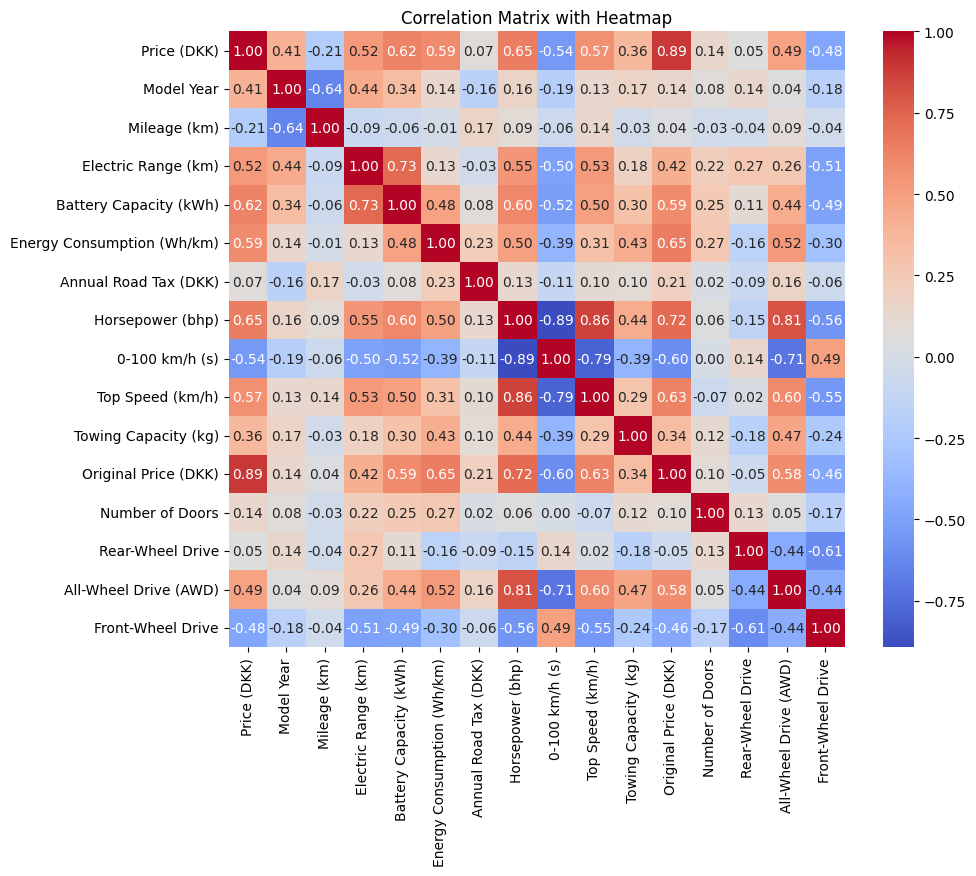

[ 1.80782240e+04 -6.25169798e-01  1.06824338e+02  3.80748250e+01
  1.11477528e+02 -3.46980312e+02  2.44953522e+01  6.48326657e+03
  1.45706666e+02  2.00274162e+01  7.38056289e-01  2.87185272e+03
  7.87050729e+03 -4.67564631e+03 -3.19486098e+03]
Mean Squared Error (MSE): 2774486707.59
Root Mean Squared Error (RMSE): 52673.40
R-squared (R²): 0.86


In [13]:
# Use this for Task 4. Add more code blocks if needed.
import matplotlib.pyplot as plt
import seaborn as sns

#Step 1: Correlation matrix, heat map overlaid.
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix with Heatmap')
plt.show()

#Step 2: Ordinary least squares
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

ols = LinearRegression()
ols.fit(X_train, y_train)

print(ols.coef_)

y_pred = ols.predict(X_test)

# Step 3: Performance Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = numpy.sqrt(mse)
r_squared = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R²): {r_squared:.2f}')





The RMSE shows that our model has a average deviation of ca. 52673 DKK when estimating prices.

The R-squared suggests that the variation the car prices can be explained by 86% with the given data we posses. This mean that there might also be factors outside of our data that influences the price

### Task 5: Ridge, Lasso and Elastic Net
In order for Ridge and Lasso (and Elastic net) to have an effect, you must use scaled data to build the models, since regularization depends on coefficient magnitude, and if using non-scaled data the penalty will affect them unequally. Feel free to use this code to scale the data:

```python
# Standardize X
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Standardize y
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).flatten()
```
For the final task you must do the following
   - Ridge regression (using multiple alphas)
   - Lasso regression (using multiple alphas)
   - Elastic Net (using multiple alphas)
 - Discussion and conclusion:
   - Discuss the MSE and $R^2$ of all 3 models and conclude which model has the best performance - note the MSE will be scaled!
   - Rebuild the OLS model from Task 4, but this time use the scaled data from this task - interpret the meaning of the model's coefficients
   - Use the coefficients of the best ridge and lasso model to print the 5 most important features and compare to the 5 most important features in the OLS with scaled data model. Do the models agree about which features are the most important?

Note: You may get a convergence warning; try increasing the `max_iter` parameter of the model (the default is 1000 - maybe set it to 100000)

In [ ]:
# Use this for Task 5. Add more code blocks if needed.
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet

scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.to_numpy().reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.to_numpy().reshape(-1, 1)).flatten()


ridge_alphas = [0.1, 1, 10, 100]
ridge_results = {}

for alpha in ridge_alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train_scaled, y_train)
    y_pred = ridge_model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    ridge_results[alpha] = (mse, r2)


lasso_alphas = [0.1, 1, 10, 100]
lasso_results = {}

for alpha in lasso_alphas:
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train_scaled, y_train)
    y_pred = lasso_model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    lasso_results[alpha] = (mse, r2)


    elastic_net_results = {}

for alpha in [0.1, 1, 10, 100]:
    elastic_net_model = ElasticNet(alpha=alpha)
    elastic_net_model.fit(X_train_scaled, y_train)
    y_pred = elastic_net_model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    elastic_net_results[alpha] = (mse, r2)


# Print results
print("Ridge Results:")
print(ridge_results)

print("\nLasso Results:")
print(lasso_results)

print("\nElastic Net Results:")
print(elastic_net_results)

# Determine the best models
best_ridge_alpha = min(ridge_results, key=lambda x: ridge_results[x][0])
best_lasso_alpha = min(lasso_results, key=lambda x: lasso_results[x][0])
best_elastic_net_alpha = min(elastic_net_results, key=lambda x: elastic_net_results[x][0])

print(f"Best Ridge Alpha: {best_ridge_alpha}, MSE: {ridge_results[best_ridge_alpha][0]}, R²: {ridge_results[best_ridge_alpha][1]}")
print(f"Best Lasso Alpha: {best_lasso_alpha}, MSE: {lasso_results[best_lasso_alpha][0]}, R²: {lasso_results[best_lasso_alpha][1]}")
print(f"Best Elastic Net Alpha: {best_elastic_net_alpha}, MSE: {elastic_net_results[best_elastic_net_alpha][0]}, R²: {elastic_net_results[best_elastic_net_alpha][1]}")


Ridge Results:
{0.1: (2774508519.203701, 0.8644253785537079), 1: (2774705826.3675237, 0.8644157372626977), 10: (2776776560.882895, 0.8643145521172588), 100: (2805852384.40912, 0.8628937802073788)}

Lasso Results:
{0.1: (2774479002.301759, 0.8644268208786384), 1: (2774413467.9843264, 0.8644300231720234), 10: (2773748723.9881682, 0.8644625054711457), 100: (2767465307.572016, 0.8647695406797647)}

Elastic Net Results:
{0.1: (2877143518.8824353, 0.8594101835624962), 1: (4218955142.6225405, 0.7938433987854179), 10: (9501919821.936178, 0.535694637823011), 100: (17855138481.012108, 0.12751983867431282)}
Best Ridge Alpha: 0.1, MSE: 2774508519.203701, R²: 0.8644253785537079
Best Lasso Alpha: 100, MSE: 2767465307.572016, R²: 0.8647695406797647
Best Elastic Net Alpha: 0.1, MSE: 2877143518.8824353, R²: 0.8594101835624962


c:\Users\Jonas Henriksen\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.720e+11, tolerance: 1.104e+10
  model = cd_fast.enet_coordinate_descent(


### Ridge Regression:
This seem to preform well. It has a relatively low MSE and a high $R^2$, which indicates there is a strong fit to the data while maintaining a balance between bias and variance, and strong relationship between the features and the target variable.

### Lasso Regression:
This one have the lowest MSE among the three, this suggests that it best predicts the car prices of the three models. like the first is the $R^2$ high.

### Elastic Net:
This one has the highest MSE relatively and $R^2$ is lower than the others, this indicates that it does not fit the data as well as the other two models.

## Rebuild the OLS model from Task 4, but this time use the scaled data from this task - interpret the meaning of the model's coefficients

In [15]:
ols = LinearRegression()    
ols.fit(X_train_scaled, y_train_scaled)

print(ols.coef_)

[ 0.16797777 -0.10321027  0.07060633  0.00538743  0.01816163 -0.06272769
  0.01798803  0.07702223  0.02558098  0.04749138  0.8500388   0.01114868
  0.02441948 -0.01448488 -0.01165009]


The model's coefficients are smaler with the scaled data. This makes sence as the diffrent features uses diffrent units whereas the scale ensures that the mean of each feature is 0 and their standart deviation is 1.

## Use the coefficients of the best ridge and lasso model to print the 5 most important features and compare to the 5 most important features in the OLS with scaled data model. Do the models agree about which features are the most important?

In [49]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd

#Drop either .”Rear-Wheel Drive”, ”All-Wheel Drive” or ”Front-Wheel Drive” since they are 1-hot encoded, always RWD+AWD+FWD=1
X_train_dropped = X_train.iloc[:, :-1]

# Get the feature names (assuming X_train is a DataFrame)
feature_names = X_train_dropped.columns

# Extract the best of the two models
best_ridge_model = Ridge(alpha=best_ridge_alpha, max_iter=100000)
best_ridge_model.fit(X_train_dropped, y_train_scaled)

best_lasso_model = Lasso(alpha=best_lasso_alpha, max_iter=100000)
best_lasso_model.fit(X_train_dropped, y_train_scaled)

# Get coefficients and identify most important features
ridge_importance = pd.Series(best_ridge_model.coef_, feature_names)
lasso_importance = pd.Series(best_lasso_model.coef_, feature_names)

# Get the 5 most important features
top_ridge_features = ridge_importance.abs().nlargest(5)
top_lasso_features = lasso_importance.abs().nlargest(5)

# Print the results
print("Top 5 Features from Ridge Regression:")
print(top_ridge_features)

print("\nTop 5 Features from Lasso Regression:")
print(top_lasso_features)

# Compare the features
ridge_set = set(top_ridge_features.index)
lasso_set = set(top_lasso_features.index)

print("\nDo the models agree on the most important features?")
print(f"Ridge vs Lasso: {ridge_set == lasso_set}")

Top 5 Features from Ridge Regression:
Model Year               0.121432
Rear-Wheel Drive         0.074319
0-100 km/h (s)           0.043548
Number of Doors          0.019290
All-Wheel Drive (AWD)    0.009951
dtype: float64

Top 5 Features from Lasso Regression:
Mileage (km)              0.000009
Original Price (DKK)      0.000005
Model Year                0.000000
Electric Range (km)       0.000000
Battery Capacity (kWh)    0.000000
dtype: float64

Do the models agree on the most important features?
Ridge vs Lasso: False
